In [1]:
state = 'MT' 
year = 2020
obj_type = 'inverse_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 150 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 6 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 536692 and U = 547533 and k = 2.

****************************************
Trying deviation = 5421.125
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 1, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 24, 25, 27, 28, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55], [2, 3, 4, 10, 13, 19, 22, 23, 26, 29, 31, 35, 46, 47, 53, 54]]
Objective value: 2.7285018036017226
Deviation: 1977.5

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to

     0     0    1.53985    0   83    2.81054    1.53985  45.2%     -    0s
     0     0    1.54287    0   84    2.81054    1.54287  45.1%     -    0s
     0     0    1.54924    0   87    2.81054    1.54924  44.9%     -    0s
     0     0    1.56394    0   91    2.81054    1.56394  44.4%     -    0s
     0     0    1.56394    0   78    2.81054    1.56394  44.4%     -    0s
     0     0    1.56991    0   79    2.81054    1.56991  44.1%     -    0s
     0     0    1.59088    0   91    2.81054    1.59088  43.4%     -    0s
     0     0    1.59254    0   92    2.81054    1.59254  43.3%     -    0s
     0     0    1.59254    0   94    2.81054    1.59254  43.3%     -    0s
     0     0    1.59254    0   94    2.81054    1.59254  43.3%     -    0s
     0     0    1.60252    0   95    2.81054    1.60252  43.0%     -    0s
     0     0    1.62023    0   95    2.81054    1.62023  42.4%     -    0s
     0     0    1.62023    0   96    2.81054    1.62023  42.4%     -    0s
     0     0    1.62023  

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1728 rows, 1394 columns and 5821 nonzeros
Model fingerprint: 0x87da8ed6
Model has 2 quadratic constraints
Variable types: 342 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [2e-03, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]

User MIP start produced solution with objective 3.84383 (0.01s)
Loaded user MIP start with objective 3.84383

Presolve removed 925 rows and 662 columns
Presolve time: 0.00s
Presolved: 803 rows, 732 columns, 3164 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 6 continuous, 726 integer (726 binary)

Root relaxation: objective 4.430403e-03, 191 iterations, 0.00 seconds (0.00 work units)

    Nodes    |  


****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55], [2, 3, 4, 10, 12, 13, 19, 22, 23, 26, 31, 35, 40, 46, 47, 53, 54]]

****************************************
Trying deviation = 4.25
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]]
Objective value: 3.856592803684794
Deviation: 3.5

****************************************
Running labeling model!
****************************************
L = 542109 and U = 542116
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
S

     0     0    1.54935    0   84    3.96083    1.54935  60.9%     -    0s
     0     0    1.54935    0   87    3.96083    1.54935  60.9%     -    0s
     0     0    1.56354    0   88    3.96083    1.56354  60.5%     -    0s
     0     0    1.57234    0   89    3.96083    1.57234  60.3%     -    0s
     0     0    1.57470    0   90    3.96083    1.57470  60.2%     -    0s
     0     0    1.58093    0   89    3.96083    1.58093  60.1%     -    0s
     0     0    1.58403    0   89    3.96083    1.58403  60.0%     -    0s
     0     0    1.58521    0   89    3.96083    1.58521  60.0%     -    0s
     0     0    1.60432    0   87    3.96083    1.60432  59.5%     -    0s
     0     0    1.60510    0   87    3.96083    1.60510  59.5%     -    0s
     0     0    1.61350    0   80    3.96083    1.61350  59.3%     -    0s
     0     0    1.61904    0   92    3.96083    1.61904  59.1%     -    0s
     0     0    1.61904    0   97    3.96083    1.61904  59.1%     -    0s
     0     0    1.62588  

 29991 10260    4.21685   44   29    4.54911    3.48788  23.3%  17.5   15s
 41700 12491     cutoff   21         4.54911    3.60710  20.7%  17.4   20s
 55976 14729     cutoff   34         4.54911    3.71029  18.4%  17.6   25s
 64728 15593    3.90482   30   29    4.54911    3.77883  16.9%  17.9   30s
 74042 15890    4.25881   31   39    4.54911    3.83951  15.6%  18.1   35s
 82358 15510     cutoff   36         4.54911    3.90279  14.2%  18.3   40s
 91067 14706    4.14737   31   22    4.54911    3.96392  12.9%  18.3   45s
 99572 12949    4.12477   31   32    4.54911    4.02232  11.6%  18.3   50s
 108108 10318 infeasible   49         4.54911    4.08614  10.2%  18.3   55s
 114619  7681     cutoff   34         4.54911    4.14214  8.95%  18.2   60s
 122378  4384    4.37811   29   19    4.54911    4.20809  7.50%  18.0   65s

Cutting planes:
  Gomory: 25
  Cover: 622
  Inf proof: 6
  Zero half: 22
  RLT: 8
  Lazy constraints: 5

Explored 129450 nodes (2289134 simplex iterations) in 69.18 second

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 0.5]



####################################################################################################
Pareto Frontier for state MT,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 2

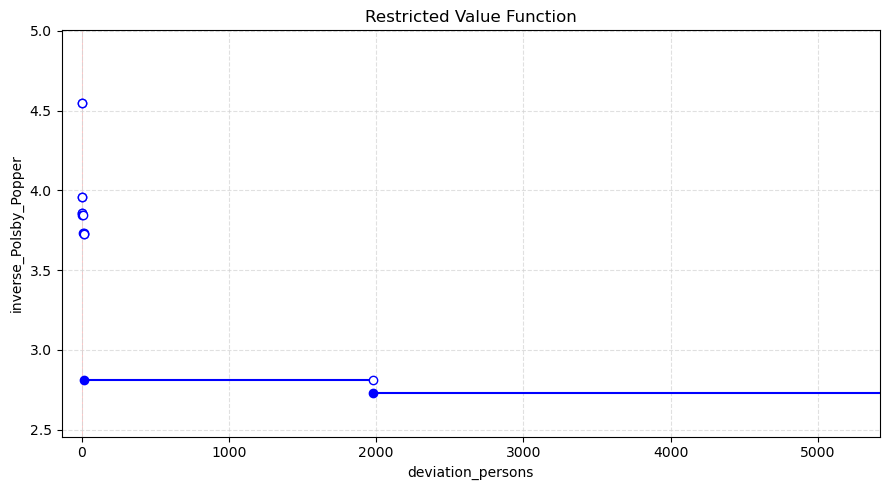

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state MT, objective inverse_Polsby_Popper
####################################################################################################



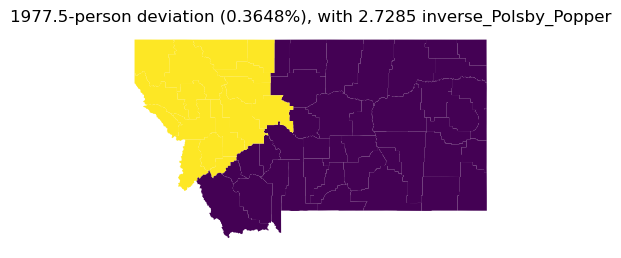

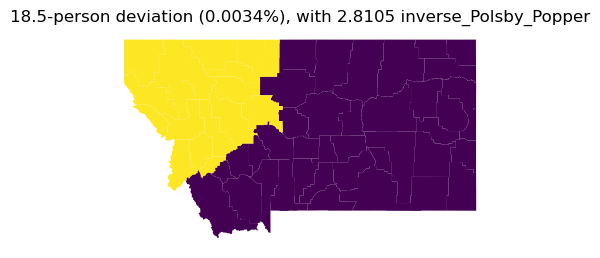

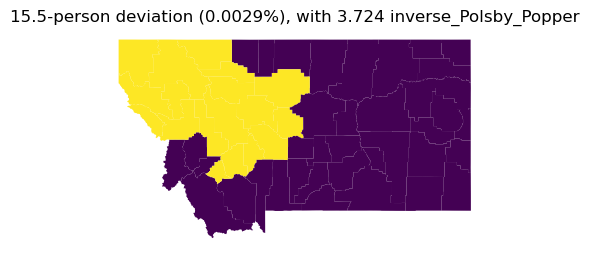

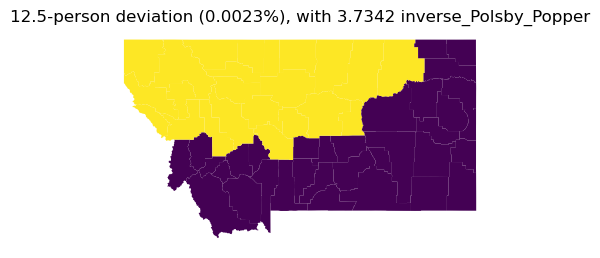

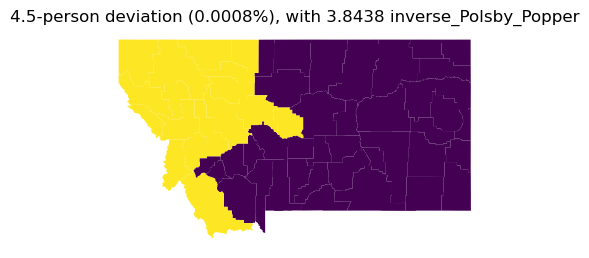

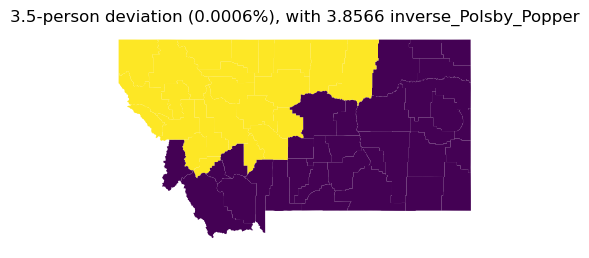

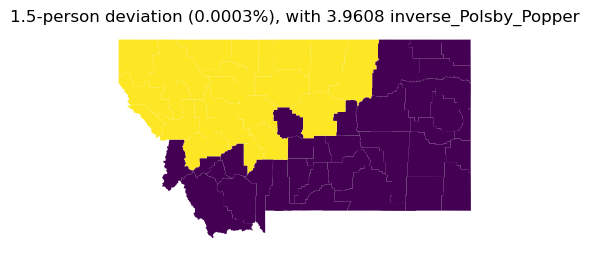

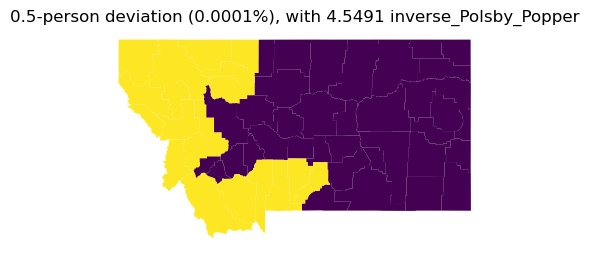

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)